<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/14_clustering/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2025-02-13 18:26:05--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.138, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2025-02-13 18:26:05--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
X=scaler.transform(df)

In [5]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

scaled_df

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,0.590636,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709
1,0.614246,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598
2,0.723089,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145
3,0.691076,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880
4,0.529812,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735
...,...,...,...,...,...,...,...
2495,0.741897,0.630435,0.441767,0.076536,0.153769,0.706226,0.182906
2496,0.476190,0.361204,0.200803,0.080704,0.050502,0.217899,0.605128
2497,0.526611,0.271739,0.405622,0.000000,0.000000,0.163424,0.776068
2498,0.012805,0.184783,0.088353,0.485808,0.032175,0.215953,0.367521


In [6]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch



# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

In [7]:
Z.shape

(2499, 4)

In [8]:
Z

array([[7.85000000e+02, 8.34000000e+02, 4.66690015e-02, 2.00000000e+00],
       [4.80000000e+01, 6.61000000e+02, 4.69811828e-02, 2.00000000e+00],
       [3.98000000e+02, 7.15000000e+02, 5.02028524e-02, 2.00000000e+00],
       ...,
       [4.98600000e+03, 4.99400000e+03, 6.02827437e+00, 1.10500000e+03],
       [4.99300000e+03, 4.99600000e+03, 1.51589368e+01, 1.75300000e+03],
       [4.99500000e+03, 4.99700000e+03, 2.19703264e+01, 2.50000000e+03]])

Text(0, 0.5, 'distance')

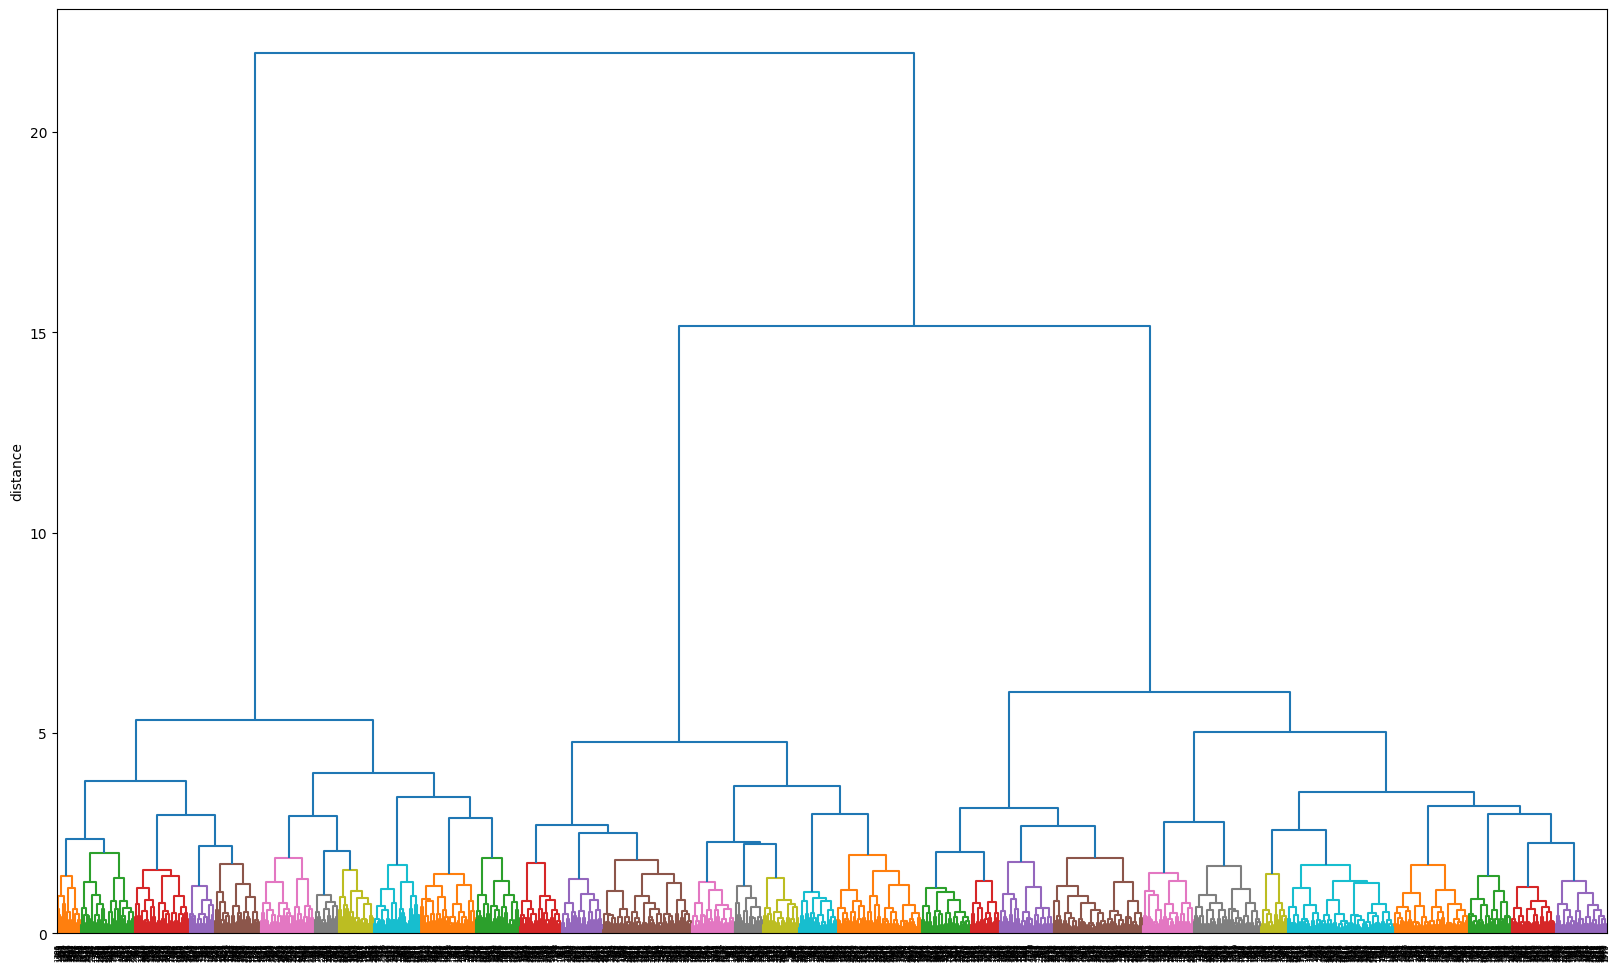

In [9]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [10]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering



# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, linkage = 'ward')
y_pred = hc_2020.fit_predict(scaled_df)


In [11]:
y_pred

array([3, 0, 4, ..., 0, 2, 1])

In [12]:
viz_df = scaled_df
viz_df['Y_Predicted'] = y_pred

In [13]:
viz_df.head()


,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,Y_Predicted
0,0.590636,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,3
1,0.614246,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,0
2,0.723089,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,4
3,0.691076,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880,1
4,0.529812,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735,3


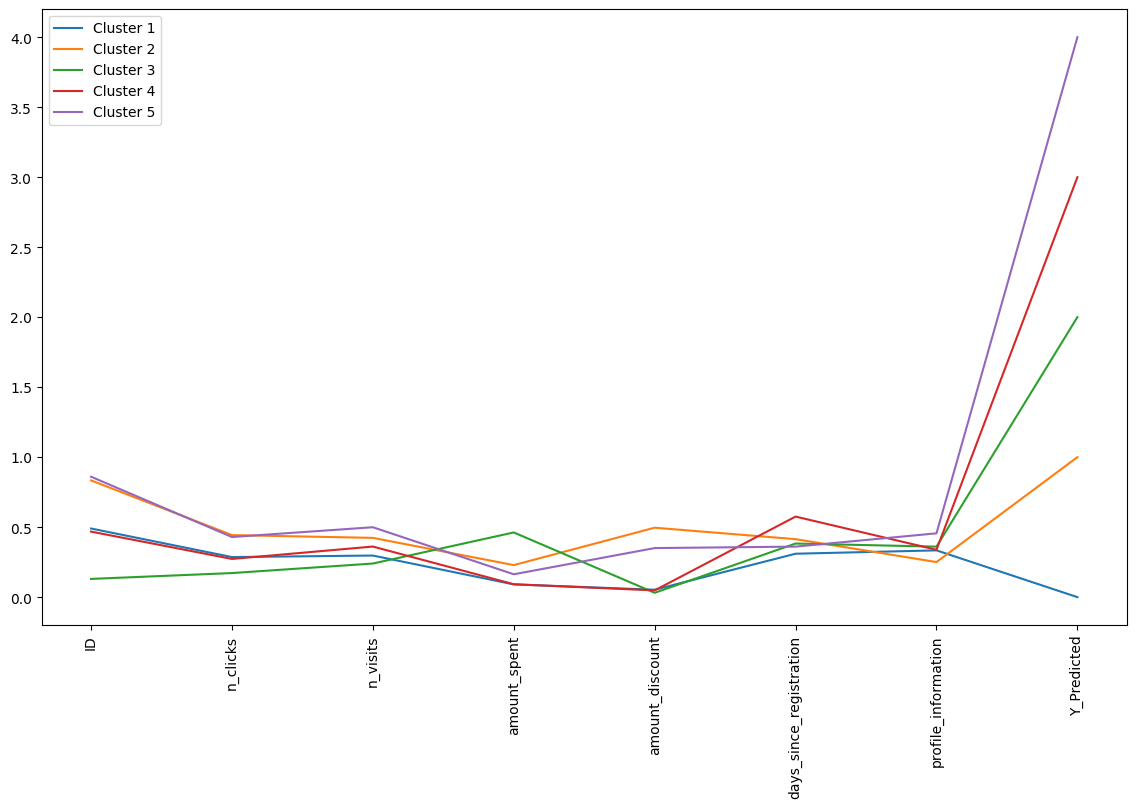

In [14]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)

In [15]:
from sklearn.metrics import silhouette_score

# Hierarchical clustering
def hierarchical_clustering_silhouette(scaled_df, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, labels)
    return silhouette_avg

# Evaluate silhouette score for different numbers of clusters
for n_clusters in range(2, 9):
    silhouette_avg = hierarchical_clustering_silhouette(scaled_df, n_clusters)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.6165602744089449
For n_clusters = 3, the average silhouette_score is : 0.6092810912048071
For n_clusters = 4, the average silhouette_score is : 0.6660057409395036
For n_clusters = 5, the average silhouette_score is : 0.7159516865138436
For n_clusters = 6, the average silhouette_score is : 0.5482752155568158
For n_clusters = 7, the average silhouette_score is : 0.3990470003049804
For n_clusters = 8, the average silhouette_score is : 0.3050355007684193


In [16]:
from sklearn.manifold import TSNE

# t-SNE dimensionality reduction
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(scaled_df)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(data=np.vstack((tsne_data.T, scaled_df['Y_Predicted'])).T, columns=("Dim_1", "Dim_2", "label"))

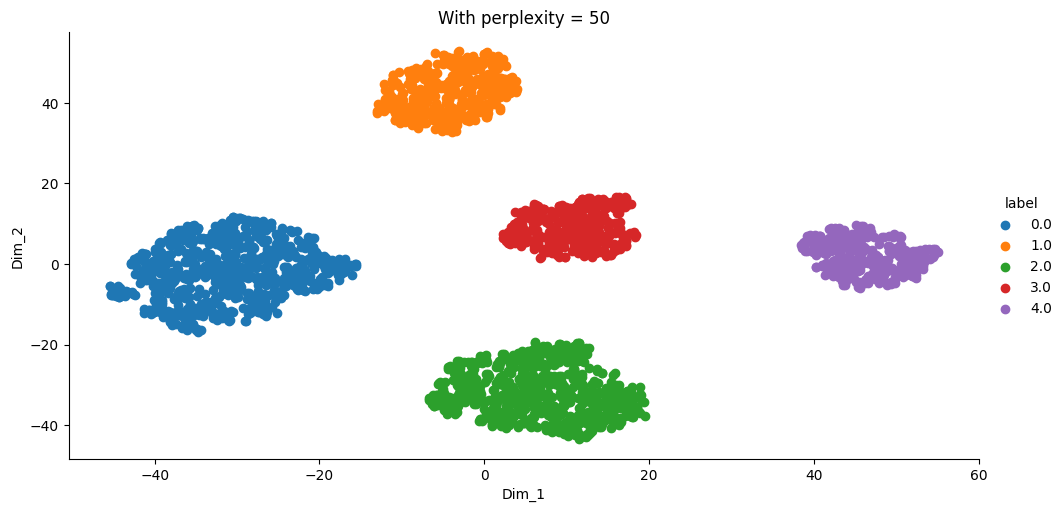

In [17]:
# Plot using Seaborn
sns.FacetGrid(tsne_df, hue="label", height=5 ,aspect= 2).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()
